In [1]:
import cobra
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
model = cobra.io.read_sbml_model('/home/student/Downloads/new_thecaphora.xml')
model.reactions.BIOMASS.objective_coefficient=1

'' is not a valid SBML 'SId'.


In [2]:
model.optimize()

,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-1.733059e-02
1.1.1.127-RXN_c,0.0,3.642919e-17
1.1.1.178-RXN_c,0.0,1.561251e-17
1.1.1.190-RXN_c,0.0,-1.733059e-02
1.1.1.210-RXN_c,0.0,1.561251e-17
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000e+00
EX_P-AMINO-BENZOATE_e,0.0,0.000000e+00
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000e+00
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,-2.599588e-02


In [3]:
model.reactions.__getattr__('CHITIN-SYN').lower_bound

0.0

In [4]:
model.reactions.__getattr__('CHITIN-SYN').reaction

'N-ACETYL-D-GLUCOSAMINE-1-P_c + UTP_c + WATER_c --> PROTON_c + Pi_c + UDP_c'

In [11]:
lower_bound_liste1 = np.linspace(0,6,100)

for i in lower_bound_liste1:
    model.reactions.__getattr__('CHITIN-SYN').lower_bound = i
    model.optimize()
    print(model.reactions.BIOMASS.flux)
m=(0.0052516932162614965-0.5199176284102998)/5.93939394
print(m)

0.5199176284102939
0.5146659351940277
0.509414241977761
0.5041625487614947
0.4989108555452311
0.4936591623289649
0.488407469112698
0.483155775896435
0.4779040826801687
0.47265238946390314
0.4674006962476387
0.4621490030313738
0.45689730981510673
0.4516456165988419
0.44639392338257466
0.4411422301663099
0.4358905369500447
0.4306388437337782
0.4253871505175149
0.4201354573012485
0.41488376408498157
0.40963207086871795
0.4043803776524486
0.39912868443618466
0.39387699121991826
0.38862529800365436
0.38337360478738847
0.3781219115711204
0.37287021835485723
0.36761852513859006
0.36236683192232594
0.35711513870605804
0.3518634454897928
0.34661175227352864
0.3413600590572614
0.33610836584099824
0.3308566726247313
0.3256049794084661
0.32035328619220116
0.3151015929759335
0.3098498997596692
0.3045982065434059
0.2993465133271367
0.29409482011087135
0.28884312689460734
0.283591433678341
0.2783397404620776
0.273088047245809
0.26783635402954525
0.26258466081327714
0.257332967597013
0.252081274380747

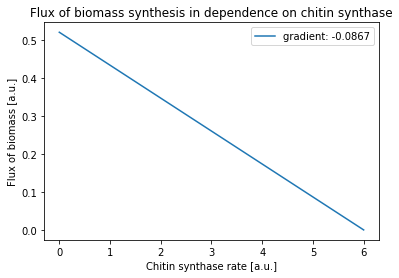

In [6]:
xs1 = lower_bound_liste1
ys1 = []
for i in xs1:
    model.reactions.__getattr__('CHITIN-SYN').lower_bound = i
    model.optimize()
    y1 = model.reactions.BIOMASS.flux
    ys1.append(y1)
model.reactions.__getattr__('CHITIN-SYN').lower_bound=0
#new_xs=xs*-1
plt.title('Flux of biomass synthesis in dependence on chitin synthase')
plt.plot(xs1,ys1,label='gradient: -0.0867')
plt.legend(loc='upper right')
plt.xlabel('Chitin synthase rate [$\frac{mmol }{g_{DW} h}$]')
#plt.xlim(0,60)
plt.ylabel('Flux of biomass [$\frac{mmol }{g_{DW} h}$]')
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/Flux of biomass synthesis in dependence on Chitin-Synthase.pdf', bbox_inches="tight")
plt.show()

In [7]:
model.reactions.__getattr__('CHITIN-SYN').lower_bound
model.reactions.__getattr__('CHITIN-SYN').lower_bound=5.5
model.optimize()
fva=cobra.flux_analysis.flux_variability_analysis(model, model.reactions[:3394])
fva.head()


,minimum,maximum
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-1.024984e-13
1.1.1.127-RXN_c,0.0,0.000000e+00
1.1.1.178-RXN_c,0.0,0.000000e+00
1.1.1.190-RXN_c,0.0,0.000000e+00
1.1.1.210-RXN_c,0.0,0.000000e+00


In [8]:
model.optimize()

,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-0.017331
1.1.1.127-RXN_c,0.0,0.000000
1.1.1.178-RXN_c,0.0,0.000000
1.1.1.190-RXN_c,0.0,-0.017331
1.1.1.210-RXN_c,0.0,0.000000
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000
EX_P-AMINO-BENZOATE_e,0.0,0.000000
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,-0.025996


In [9]:
#Baue Dataframe für den Plot

namesM=list(fva.index)
minM=np.array(list(fva['minimum']))
maxM=np.array(list(fva['maximum']))
n=len(namesM)
#filtere Null Intervalle
names1=[]
minimum1=[]
maximum1=[]

# Messfehler sorgen fr schwankungen in den Daten, sodass auch 'gleiche' Werte sich leiht unterscheiden
#eps=1e-10# Dieser Parameter gibt an ab welcher Distanz die differenz zweier werte als nicht Null gewertet werden soll

eps=2

for i in range(n):
#    if abs(minM[i]-maxM[i])>eps:
     if abs(minM[i])>eps and abs(maxM[i])>eps:# and maxM[i]+minM[i]<0.1:
        if abs(maxM[i])<998 and abs(minM[i])<998:
#     if abs(minM[i])>eps:

            names1.append(namesM[i])
            minimum1.append(minM[i])
            maximum1.append(maxM[i])

df1 = panda.DataFrame()
df1['names1']=names1
df1['minimum1']= minimum1
df1['maximum1']= maximum1

print(len(names1))
#print(df)
df1

28


,names1,minimum1,maximum1
0,2PGADEHYDRAT-RXN_c,8.853019,8.853019
1,6PFRUCTPHOS-RXN_c,4.431355,4.431355
2,ATPSYN-RXN_c_p,-11.210180,-11.210180
3,F16ALDOLASE-RXN_c,4.431355,4.431355
4,GLUTAMINESYN-RXN_c,5.612117,5.612117
5,HOMOCITRATE-SYNTHASE-RXN_c,2.779667,2.779667
6,KETOGLUTREDUCT-RXN_c,2.765220,2.765220
7,L-GLN-FRUCT-6-P-AMINOTRANS-RXN__var__0_c,5.500000,5.500000
8,PEPDEPHOS-RXN_c,8.821023,8.821023
9,PHOSGLYPHOS-RXN_c,-8.853019,-8.853019


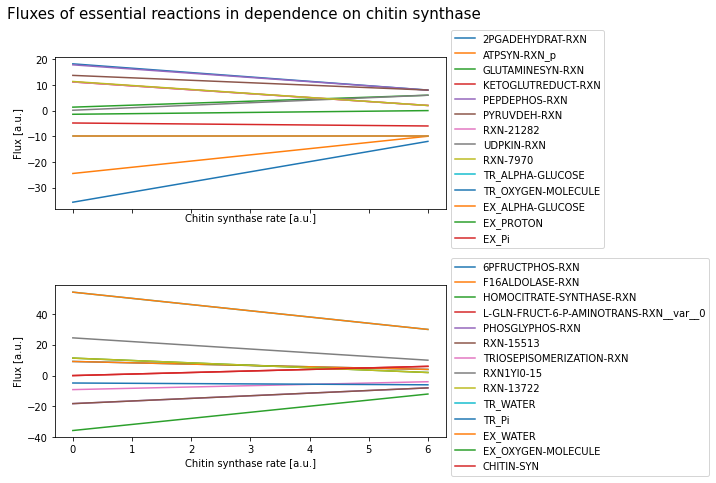

In [12]:
size= 2
fig, plots= plt.subplots(size,sharex=True, figsize=(7, 7))

for n, name in enumerate(names1):
    xs = lower_bound_liste1
    ys = []
    for i in xs:
        model.reactions.__getattr__('CHITIN-SYN').lower_bound = i
        model.optimize()
        y = model.reactions.__getattr__(name).flux
        ys.append(y)
    model.reactions.__getattr__('CHITIN-SYN').lower_bound=0
    new_xs=xs*-1
    #plt.title('oxygen-dependent-flux of inevitable Reactions')
    name=name.replace('_c','')
    name=name.replace('_e','')
    name=name.replace('__var__0_p','')
    plots[n%size].plot(xs,ys,label=name)
        #plt.legend(loc='upper right')
plots[0].set_xlabel('Chitin synthase rate [$\frac{mmol }{g_{DW} h}$]')
plots[1].set_xlabel('Chitin synthase rate [$\frac{mmol }{g_{DW} h}$]')
#plots[0].xticks(False)
plots[0].set_ylabel('Flux [$\frac{mmol }{g_{DW} h}$]')
plots[1].set_ylabel('Flux [$\frac{mmol }{g_{DW} h}$]')
plots[0].legend(bbox_to_anchor =(1, 1.2, 0.01, 0.01))
plots[1].legend(bbox_to_anchor =(1, 1.2, 0.01, 0.01))
fig.suptitle('Fluxes of essential reactions in dependence on chitin synthase', fontsize=15)
fig.subplots_adjust(hspace=0.5)
#fig.tight_layout()
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/chitin-dependent-flux of inevitable Reactions.pdf', bbox_inches="tight")
plt.show()